In [ ]:
import pandas as pd

# Baca file Excel
df = pd.read_excel('tanpatandamifta.xlsx')


In [ ]:
df.head(10)

,komentar,Compound_Scores,Sentiments
0,vaksin paksa karena butuh sertifikat mumpung g...,0.0516,Positive
1,aparat desa sok,0.3182,Positive
2,rumah sakit gratis kalo abis vaksin pinggang s...,0.1027,Positive
3,lihat kolom komen orang oceh paham virus ahli ...,0.0516,Positive
4,suntik booster bentuk optimal resiko,0.3612,Positive
5,dengar omongan edit sesal nantinya udah vaksin...,0.0516,Positive
6,hak orang aman covid vaksin sedangkan orang ke...,0.7003,Positive
7,minggu depan jadwal vaksin minggu dosis sinova...,0.1280,Positive
8,sok ngatur tidak vaksin,0.3182,Positive
9,daring capek anjir,0.3612,Positive


In [ ]:
# Filter data sentimen positif
sentimen_positif = df[df['Sentiments'] == 'Positive']

# Filter data sentimen negatif
sentimen_negatif = df[df['Sentiments'] == 'Negative']


In [ ]:
# Gabungkan teks sentimen positif menjadi satu string
teks_positif = ' '.join(sentimen_positif['komentar'].astype(str))

# Gabungkan teks sentimen negatif menjadi satu string
teks_negatif = ' '.join(sentimen_negatif['komentar'].astype(str))


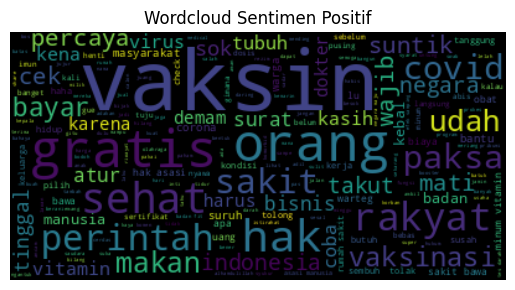

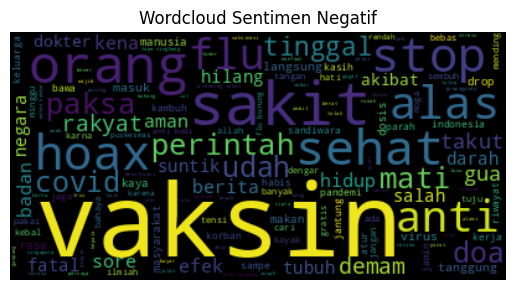

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Konfigurasi WordCloud
wordcloud = WordCloud(background_color='white')

# Buat wordcloud sentimen positif
wordcloud_positif = WordCloud().generate(teks_positif)

# Buat wordcloud sentimen negatif
wordcloud_negatif = WordCloud().generate(teks_negatif)

# Tampilkan wordcloud sentimen positif
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Sentimen Positif")
plt.show()

# Tampilkan wordcloud sentimen negatif
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Sentimen Negatif")
plt.show()


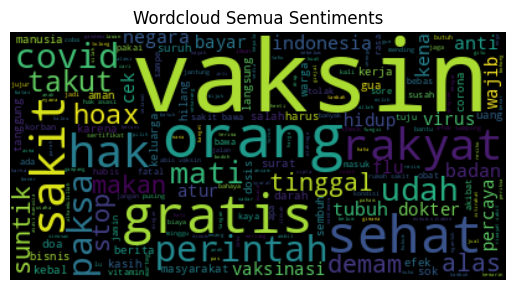

In [ ]:

# Pisahkan teks sentimen negatif dan positif
teks_negatif = " ".join(df[df["Sentiments"] == "Negative"]["komentar"].tolist())
teks_positif = " ".join(df[df["Sentiments"] == "Positive"]["komentar"].tolist())

# Gabungkan teks sentimen negatif dan positif
teks_semua = teks_negatif + " " + teks_positif

# Buat wordcloud dari teks panjang
wordcloud = WordCloud().generate(teks_semua)

# Tampilkan wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud Semua Sentiments")
plt.axis('off')

plt.show()


In [ ]:
from collections import Counter

# Hitung frekuensi kata-kata dalam teks positif
freq_positif = Counter(teks_positif.split())

# Hitung frekuensi kata-kata dalam teks negatif
freq_negatif = Counter(teks_negatif.split())


In [ ]:
# Ambil 10 kata dengan frekuensi tertinggi dari teks positif
top_kata_positif = freq_positif.most_common(10)
kata_positif = [kata for kata, frekuensi in top_kata_positif]
frekuensi_positif = [frekuensi for kata, frekuensi in top_kata_positif]

# Ambil 10 kata dengan frekuensi tertinggi dari teks negatif
top_kata_negatif = freq_negatif.most_common(10)
kata_negatif = [kata for kata, frekuensi in top_kata_negatif]
frekuensi_negatif = [frekuensi for kata, frekuensi in top_kata_negatif]


<ipython-input-14-1a180ee30488>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palet_warna = plt.cm.get_cmap('Set3')


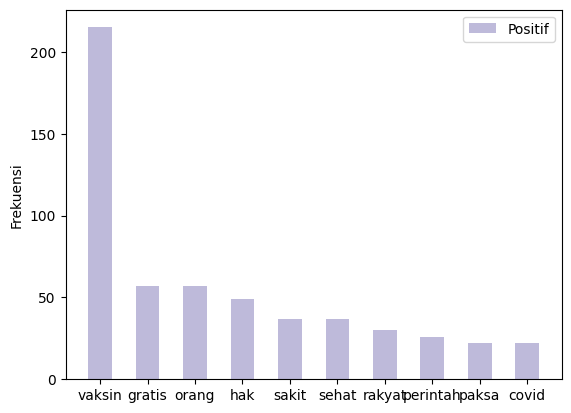

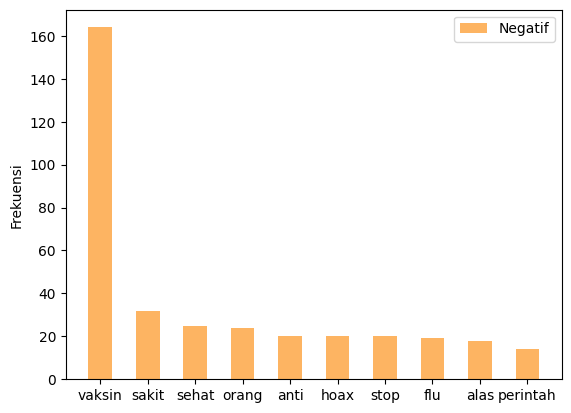

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Buat array indeks untuk sumbu x
indeks_positif = np.arange(len(kata_positif))
indeks_negatif = np.arange(len(kata_negatif))

# Buat palet warna
palet_warna = plt.cm.get_cmap('Set3')

# Atur lebar bar
lebar = 0.5

# Buat bar chart untuk frekuensi kata-kata positif
plt.bar(indeks_positif, frekuensi_positif, lebar, color=palet_warna(2), label='Positif')

# Atur label sumbu x
plt.xticks(indeks_positif, kata_positif)

# Atur label sumbu y
plt.ylabel('Frekuensi')

# Tampilkan legenda
plt.legend()

# Tampilkan bar chart kata-kata positif
plt.show()

# Buat bar chart untuk frekuensi kata-kata negatif
plt.bar(indeks_negatif, frekuensi_negatif, lebar, color=palet_warna(5), label='Negatif')

# Atur label sumbu x
plt.xticks(indeks_negatif, kata_negatif)

# Atur label sumbu y
plt.ylabel('Frekuensi')

# Tampilkan legenda
plt.legend()

# Tampilkan bar chart kata-kata negatif
plt.show()